<a href="https://colab.research.google.com/github/deviandinifebrianti/PCVK_Genap_2023/blob/main/Kuis2_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np

## Preprocessing

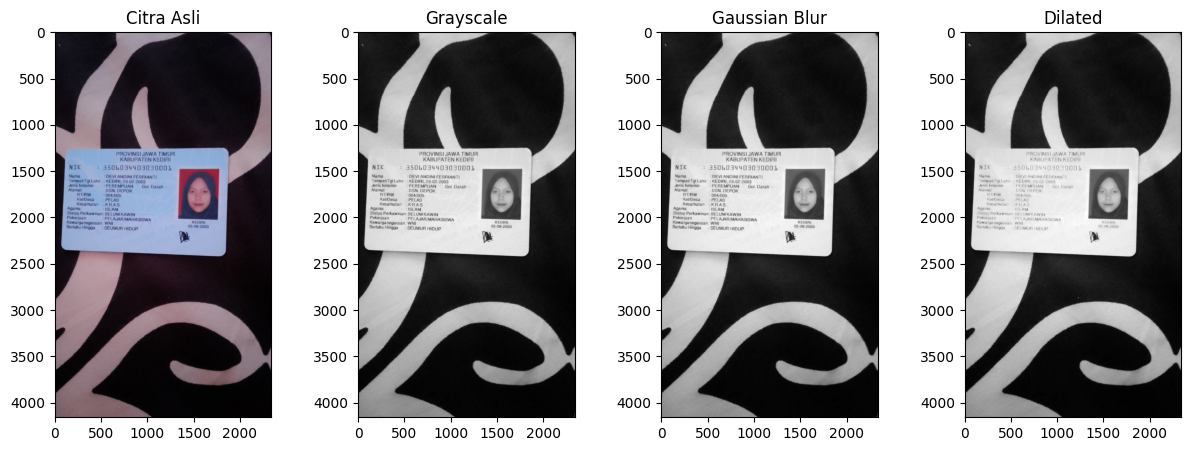

In [5]:
# Fungsi pre-processing untuk KTP
def preprocess_ktp(image_path):
    # Baca gambar KTP
    ktp_img = cv2.imread(image_path)

    # Ubah ke citra grayscale
    ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

    # Terapkan filter Gaussian blur untuk mengurangi noise
    ktp_blurred = cv2.GaussianBlur(ktp_gray, (5, 5), 0)

    # Terapkan operasi morfologi (dilasi) untuk menghubungkan area yang berdekatan
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    ktp_dilated = cv2.dilate(ktp_blurred, kernel, iterations=1)

    return ktp_img, ktp_gray, ktp_blurred, ktp_dilated

# Path foto KTP
ktp_image_path = "/content/drive/MyDrive/KTPKU/devi2.jpg"

# Jalankan pre-processing
ktp_original, ktp_gray, ktp_blurred, ktp_dilated = preprocess_ktp(ktp_image_path)

# Tampilkan hasil pre-processing
plt.figure(figsize=(15, 5))

plt.subplot(141), plt.imshow(cv2.cvtColor(ktp_original, cv2.COLOR_BGR2RGB)), plt.title('Citra Asli')
plt.subplot(142), plt.imshow(ktp_gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(143), plt.imshow(ktp_blurred, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(144), plt.imshow(ktp_dilated, cmap='gray'), plt.title('Dilated')

plt.show()

## Lokalisasi

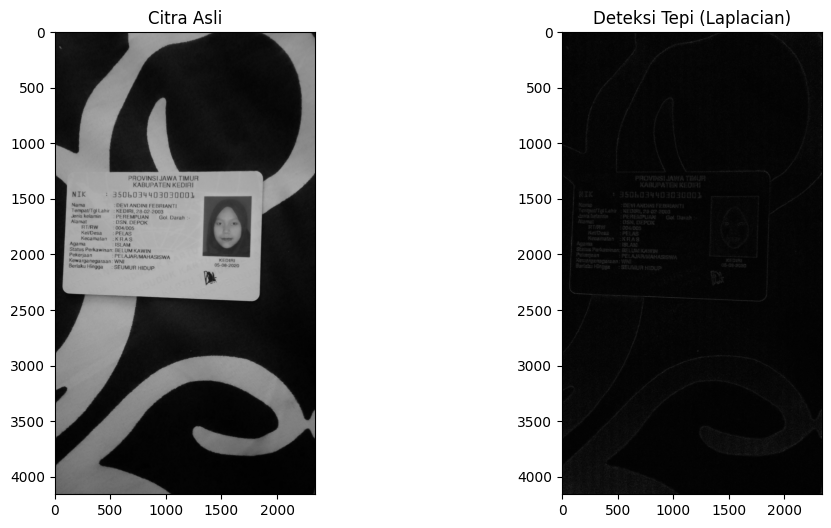

In [6]:
def localize_edges(image_path):
    # Baca gambar dari path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Terapkan filter Laplacian
    edges = cv2.Laplacian(image, cv2.CV_64F)

    # Ambil nilai absolut
    edges = cv2.convertScaleAbs(edges)

    # Tampilkan gambar asli dan hasil deteksi tepi bersebelahan
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Deteksi Tepi (Laplacian)')

    plt.show()

# Path foto KTP
ktp_image_path = "/content/drive/MyDrive/KTPKU/devi2.jpg"

# Jalankan program
localize_edges(ktp_image_path)

## Segmentasi

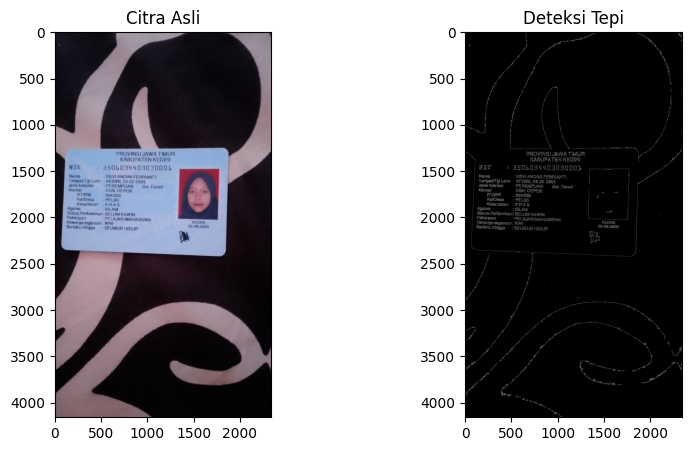

In [7]:
# Baca gambar KTP
img_path = "/content/drive/MyDrive/KTPKU/devi2.jpg"
img = cv2.imread(img_path)

# Ubah ke citra grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Terapkan Canny edge detection
edges = cv2.Canny(img_gray, 30, 200)

# Aplikasikan teknik dilasi untuk menyatukan tepi yang saling berdekatan
dilated_edges = cv2.dilate(edges, None, iterations=2)

# Temukan kontur pada gambar hasil dilasi
contours, hierarchy = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Citra Asli')
plt.subplot(132), plt.imshow(edges, cmap='gray'), plt.title('Deteksi Tepi')
plt.show()

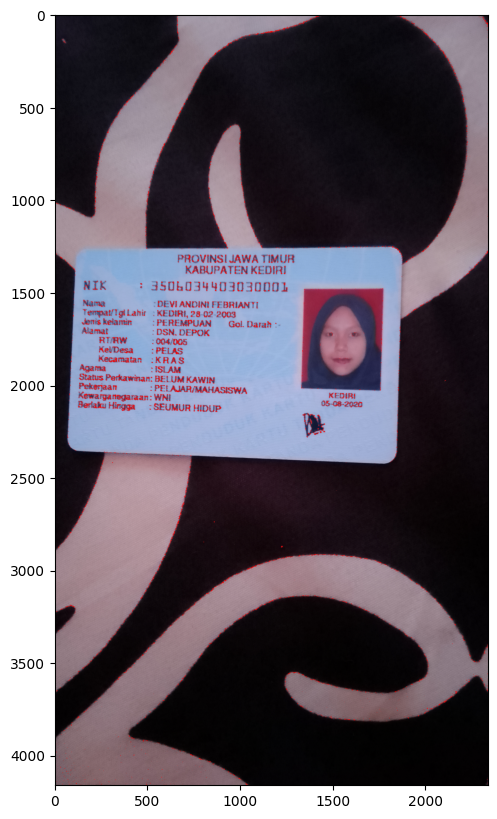

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input
input_img = cv.imread('/content/drive/MyDrive/KTPKU/devi2.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

## Face Recognition

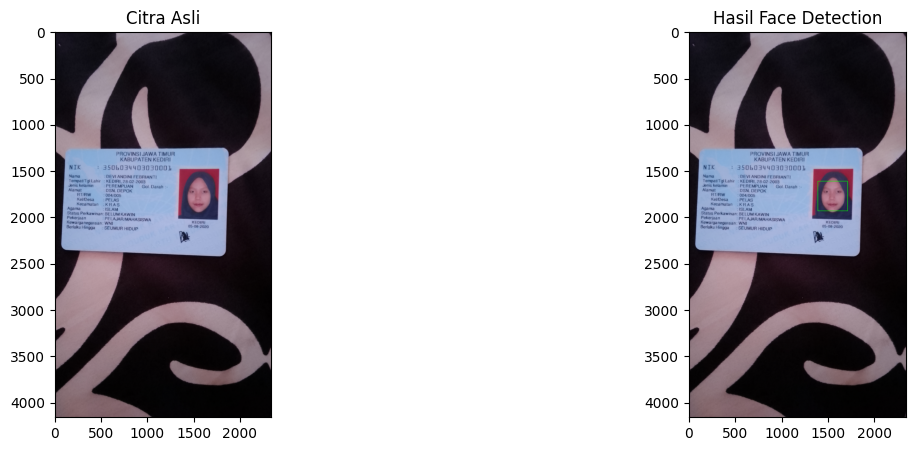

In [9]:
# Inisialisasi cascade classifier untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

def proses_ktp(file_path):
    ktp = cv.imread(file_path)
    ktp_copy = ktp.copy()

    # Ubah gambar menjadi grayscale untuk meningkatkan kecepatan deteksi
    gray_ktp = cv.cvtColor(ktp_copy, cv.COLOR_BGR2GRAY)

    # Deteksi wajah pada gambar grayscale
    roi_wajah = cascade_wajah.detectMultiScale(gray_ktp, scaleFactor=1.1, minNeighbors=8, minSize=(50, 50))

    # Fokus hanya pada objek wajah
    for (x, y, w, h) in roi_wajah:
        roi_wajah_copy = ktp_copy[y:y+h, x:x+w]
        cv.rectangle(ktp, (x, y), (x+w, y+h), (0, 255, 0), 3)

    return ktp_copy, ktp

# Daftar file KTP
file_paths = [
    '/content/drive/MyDrive/KTPKU/devi2.jpg',
]

# Proses setiap file KTP
for i, file_path in enumerate(file_paths):
    ktp_original, ktp_with_faces = proses_ktp(file_path)

    # Tampilkan hasil
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(ktp_original, cv.COLOR_BGR2RGB))
    axarr[0].set_title('Citra Asli')

    axarr[1].imshow(cv.cvtColor(ktp_with_faces, cv.COLOR_BGR2RGB))
    axarr[1].set_title('Hasil Face Detection')

    plt.show()